In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import models,backend
backend.set_image_data_format('channels_last')

In [2]:
json_file = open('model.json', 'r')
model_json = json_file.read()
json_file.close()
model = models.model_from_json(model_json)
model.load_weights("model.h5")

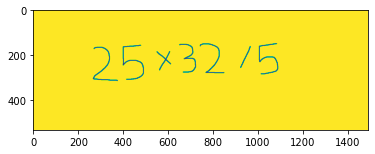

In [3]:
import cv2
import numpy as np
image = cv2.imread('C:/Users/getch/Pictures/test.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
if image is not None:
    image=~image
    ret,thresh=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    ctrs=(cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE))[0]
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]) and rec[0]<(r[0]+r[2]) and r[1]<(rec[1]+rec[3]) and rec[1]<(r[1]+r[3]):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    final_rect=[i for i in rects if i not in dump_rect]
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y-10:y+h+10,x-10:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

In [4]:
switch={x:str(x) for x in range(10)}
switch[10]='+'
switch[11]='-'
switch[12]='/'
switch[13]='*'
switch[14]='('
switch[15]=')'
switch

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '+',
 11: '-',
 12: '/',
 13: '*',
 14: '(',
 15: ')'}

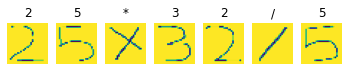

In [5]:
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=1)
    plt.subplot(1,len(train_data),i+1)
    plt.imshow(~(train_data[i].reshape(28,28)))
    plt.title(switch[result[0]])
    plt.axis('off')
    s+=switch[result[0]]

In [6]:
s

'25*32/5'

In [7]:
eval(s)

160.0